In [28]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

def extract_tables_from_url(url):
    # Fetch the HTML content
    response = requests.get(url)
    html_content = response.content

    soup = BeautifulSoup(html_content, 'html.parser')
    tables = soup.find_all('table', class_='table-auto w-full text-xs leading-loose')

    dataframes = []
    for table in tables:
        df = pd.read_html(str(table))[0]
        dataframes.append(df)
    
    return dataframes
    
    
    


In [37]:
url = 'https://programming-language-benchmarks.vercel.app/python-vs-rust'
dataframes = extract_tables_from_url(url)


import pandas as pd
concatenated = pd.concat(dataframes, axis=0, ignore_index=True)

In [38]:
pythons = concatenated[concatenated[0] == 'python']
rusts = concatenated[concatenated[0] == 'rust']

In [39]:
def parse_time(time_str):
    if time_str == 'timeout':
        return None
    else:
        return float(time_str.replace('ms', ''))

In [40]:
pythons[2] = pythons[2].apply(parse_time)


<ipython-input-40-2c859d9c45fe>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pythons[2] = pythons[2].apply(parse_time)


In [41]:
rusts[2] = rusts[2].apply(parse_time)

<ipython-input-41-36a1f4ca5c3d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rusts[2] = rusts[2].apply(parse_time)


In [50]:
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker


In [46]:
mean_df1 = pythons[2].mean()
mean_df2 = rusts[2].mean()

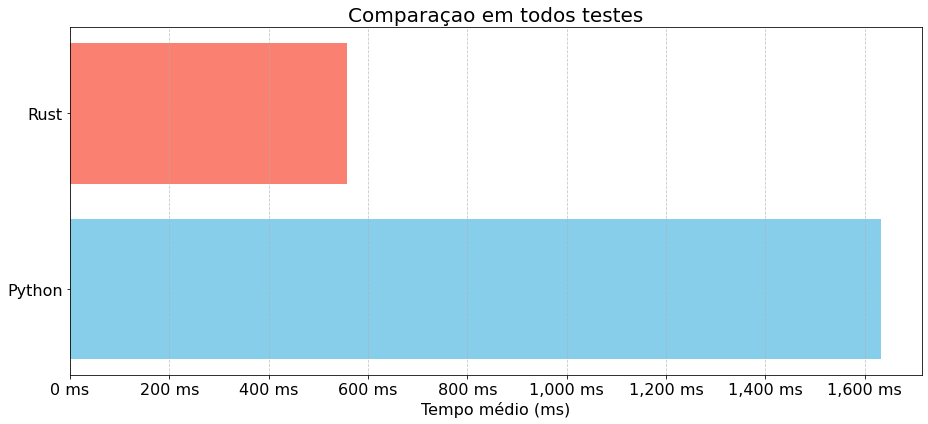

In [71]:
labels = ['Python', 'Rust']
colors = ['skyblue', 'salmon']
means = [mean_df1, mean_df2]

plt.figure(figsize=(13, 6))
bars = plt.barh(labels, means, color=colors, edgecolor='none')

# for bar in bars:
#     plt.gca().text(bar.get_width(), bar.get_y() + bar.get_height() / 2,
#                    f'{bar.get_width():.2f}',
#                    ha='left', va='center', fontsize=12, color='black')


plt.xlabel('Tempo médio (ms)', fontsize=16)
plt.title('Comparação em todos testes', fontsize=20)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)

plt.gca().xaxis.set_major_formatter(mticker.StrMethodFormatter('{x:,.0f} ms'))

plt.grid(axis='x', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()
